1. EDA
merge datasets
handle missing values and outliers

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
completed_orders = pd.read_csv('drive/MyDrive/gokada_data/nb.csv')
delivery_requests = pd.read_csv('drive/MyDrive/gokada_data/driver_locations_during_request.csv')

In [38]:
completed_orders.head()

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36


In [39]:
delivery_requests.head()

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001,243828,accepted,6.602207,3.270465,NaN,NaN
1,2,392001,243588,rejected,6.592097,3.287445,NaN,NaN
2,3,392001,243830,rejected,6.596133,3.281784,NaN,NaN
3,4,392001,243539,rejected,6.596142,3.280526,NaN,NaN
4,5,392001,171653,rejected,6.609232,3.288800,NaN,NaN


In [40]:
completed_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Trip ID           536020 non-null  int64 
 1   Trip Origin       536020 non-null  object
 2   Trip Destination  536020 non-null  object
 3   Trip Start Time   534369 non-null  object
 4   Trip End Time     536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB


In [41]:
delivery_requests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   driver_id      1557740 non-null  int64  
 3   driver_action  1557740 non-null  object 
 4   lat            1557740 non-null  float64
 5   lng            1557740 non-null  float64
 6   created_at     0 non-null        float64
 7   updated_at     0 non-null        float64
dtypes: float64(4), int64(3), object(1)
memory usage: 95.1+ MB


In [42]:
completed_orders.isnull().sum()

Trip ID                0
Trip Origin            0
Trip Destination       0
Trip Start Time     1651
Trip End Time          1
dtype: int64

In [43]:
delivery_requests.isnull().sum()

id                     0
order_id               0
driver_id              0
driver_action          0
lat                    0
lng                    0
created_at       1557740
updated_at       1557740
dtype: int64

In [49]:
df = delivery_requests.merge(completed_orders, how='inner', left_on='order_id', right_on='Trip ID')
df.head()

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,1,392001,243828,accepted,6.602207,3.270465,NaN,NaN,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36
1,2,392001,243588,rejected,6.592097,3.287445,NaN,NaN,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36
2,3,392001,243830,rejected,6.596133,3.281784,NaN,NaN,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36
3,4,392001,243539,rejected,6.596142,3.280526,NaN,NaN,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36
4,5,392001,171653,rejected,6.609232,3.288800,NaN,NaN,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36


In [50]:
df.isna().sum()

id                        0
order_id                  0
driver_id                 0
driver_action             0
lat                       0
lng                       0
created_at          1557740
updated_at          1557740
Trip ID                   0
Trip Origin               0
Trip Destination          0
Trip Start Time        2022
Trip End Time             0
dtype: int64

In [51]:
df.shape

(1557740, 13)

In [53]:
df.drop_duplicates(inplace=True)
df.shape

(1557740, 13)

In [57]:
columns_to_drop = ['created_at', 'updated_at']
df = df.drop(columns=columns_to_drop)
df.head()

,id,order_id,driver_id,driver_action,lat,lng,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,1,392001,243828,accepted,6.602207,3.270465,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36
1,2,392001,243588,rejected,6.592097,3.287445,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36
2,3,392001,243830,rejected,6.596133,3.281784,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36
3,4,392001,243539,rejected,6.596142,3.280526,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36
4,5,392001,171653,rejected,6.609232,3.288800,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36


In [58]:
df['Trip Start Time'] = pd.to_datetime(df['Trip Start Time'])
df['Trip End Time'] = pd.to_datetime(df['Trip End Time'])

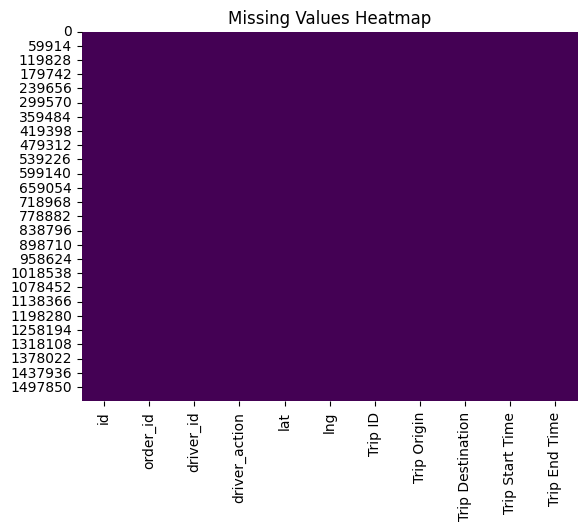

In [60]:
# plot missing values
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [62]:
# calculate percentage of missing values with imputation
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage)


id                  0.000000
order_id            0.000000
driver_id           0.000000
driver_action       0.000000
lat                 0.000000
lng                 0.000000
Trip ID             0.000000
Trip Origin         0.000000
Trip Destination    0.000000
Trip Start Time     0.129803
Trip End Time       0.000000
dtype: float64


In [63]:
df['Trip Start Time'].head()

0   2021-07-01 09:30:59
1   2021-07-01 09:30:59
2   2021-07-01 09:30:59
3   2021-07-01 09:30:59
4   2021-07-01 09:30:59
Name: Trip Start Time, dtype: datetime64[ns]

In [68]:
# drop missing values since they are a small percentage
df.dropna(inplace=True)
df.isna().sum()
df.shape

(1555718, 11)

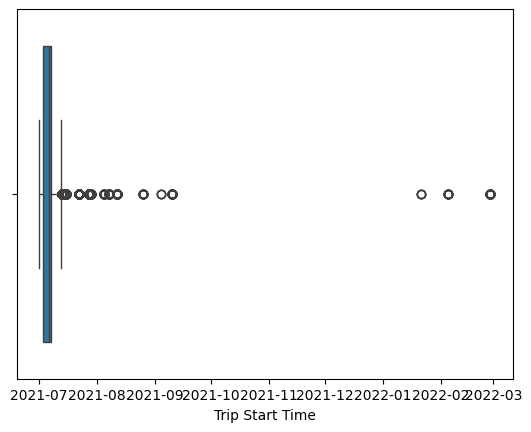

In [77]:
# investigate outliers
sns.boxplot(x=df['Trip Start Time'])
plt.show()

In [70]:


class OutlierHandler:
    def __init__(self, df):
        self.df = df

    def calculate_iqr(self, column):
        Q1 = self.df[column].quantile(0.25)
        Q3 = self.df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return lower_bound, upper_bound

    def detect_outliers(self, column):
        lower_bound, upper_bound = self.calculate_iqr(column)
        outliers = self.df[(self.df[column] < lower_bound) | (self.df[column] > upper_bound)]
        return outliers

    def remove_outliers(self, column):
        lower_bound, upper_bound = self.calculate_iqr(column)
        self.df = self.df[(self.df[column] >= lower_bound) & (self.df[column] <= upper_bound)]

    def impute_outliers(self, column):
        lower_bound, upper_bound = self.calculate_iqr(column)
        median_value = self.df[(self.df[column] >= lower_bound) & (self.df[column] <= upper_bound)][column].median()
        self.df[column] = self.df[column].apply(
            lambda x: median_value if (x < lower_bound or x > upper_bound) else x
        )

    def handle_all_columns(self, method='remove'):
        numerical_columns = self.df.select_dtypes(include=['float64', 'int64']).columns
        categorical_columns = self.df.select_dtypes(include=['object']).columns

        for column in numerical_columns:
            if method == 'remove':
                self.remove_outliers(column)
            elif method == 'impute':
                self.impute_outliers(column)

        for column in categorical_columns:
            mode_value = self.df[column].mode()[0]
            self.df[column].fillna(mode_value, inplace=True)


In [ ]:
if __name__ == "__main__":

    # Instantiate and apply OutlierHandler
    handler = OutlierHandler(df)
    handler.handle_all_columns(method='impute')

    print(df.head())

2. Feature Engineering

In [80]:
df['Hour'] = df['Trip Start Time'].dt.hour
df['DayOfWeek'] = df['Trip Start Time'].dt.dayofweek
df['Month'] = df['Trip Start Time'].dt.month

In [81]:
df.head()

,id,order_id,driver_id,driver_action,lat,lng,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,Hour,DayOfWeek,Month
0,1,392001.0,243828.0,accepted,6.602207,3.363413,392001.0,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,9,3,7
1,2,392001.0,243588.0,rejected,6.592097,3.363413,392001.0,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,9,3,7
2,3,392001.0,243830.0,rejected,6.596133,3.363413,392001.0,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,9,3,7
3,4,392001.0,243539.0,rejected,6.596142,3.363413,392001.0,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,9,3,7
4,5,392001.0,243768.0,rejected,6.609232,3.363413,392001.0,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,9,3,7


add weather data from open weather map api

In [86]:
import pandas as pd
import requests

class DataEnricher:
    def __init__(self, df):
        self.df = df

    def add_rainfall_data(self, api_key):
        base_url = "https://api.openweathermap.org/data/2.5/weather"

        # Get unique dates from the DataFrame
        dates_to_enrich = self.df['Trip Start Time'].dt.date.unique()

        for date in dates_to_enrich:
            date_str = str(date)
            timestamp = pd.Timestamp(date_str).timestamp()  # Convert date to Unix timestamp

            params = {
                "q": "Lagos,NG",
                "appid": api_key,
                "units": "metric",
                "dt": int(timestamp)  # Convert timestamp to integer
            }

            response = requests.get(base_url, params=params)
            if response.status_code == 200:
                weather_data = response.json()
                if 'rain' in weather_data:
                    rainfall = weather_data['rain'].get('1h', 0)  # Rainfall in the last hour (mm)
                    self.df.loc[self.df['Trip Start Time'].dt.date == date, 'Rainfall (mm)'] = rainfall
                else:
                    print("No rainfall data available for", date_str)
            else:
                print("Failed to fetch weather data for", date_str, ". Status code:", response.status_code)

# Instantiate DataEnricher
enricher = DataEnricher(df)

# Add rainfall data for all dates using OpenWeatherMap API (Replace 'your_api_key' with your actual API key)
api_key = '804f5f5ee14539317abcf1018bf4e796'
enricher.add_rainfall_data(api_key)


No rainfall data available for 2021-07-01
No rainfall data available for 2021-07-02
No rainfall data available for 2021-07-04
No rainfall data available for 2021-07-03
No rainfall data available for 2021-07-07
No rainfall data available for 2021-07-06
No rainfall data available for 2021-07-05
No rainfall data available for 2021-07-08
No rainfall data available for 2021-07-10
No rainfall data available for 2021-07-09
No rainfall data available for 2021-07-13
No rainfall data available for 2021-07-22
No rainfall data available for 2021-08-04
No rainfall data available for 2021-07-28
No rainfall data available for 2021-07-11
No rainfall data available for 2021-07-27
No rainfall data available for 2021-07-12
No rainfall data available for 2021-08-11
No rainfall data available for 2021-08-07
No rainfall data available for 2021-07-14
No rainfall data available for 2021-07-15
No rainfall data available for 2021-08-25
No rainfall data available for 2022-02-04
No rainfall data available for 202

In [87]:
df.head()

,id,order_id,driver_id,driver_action,lat,lng,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,Hour,DayOfWeek,Month
0,1,392001.0,243828.0,accepted,6.602207,3.363413,392001.0,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,9,3,7
1,2,392001.0,243588.0,rejected,6.592097,3.363413,392001.0,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,9,3,7
2,3,392001.0,243830.0,rejected,6.596133,3.363413,392001.0,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,9,3,7
3,4,392001.0,243539.0,rejected,6.596142,3.363413,392001.0,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,9,3,7
4,5,392001.0,243768.0,rejected,6.609232,3.363413,392001.0,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,9,3,7


calculate distance and speed

In [93]:
import pandas as pd
from geopy.distance import geodesic
from ast import literal_eval  # Import literal_eval to safely evaluate string literals as Python literals

class DistanceCalculator:
    def __init__(self, df):
        self.df = df

    def parse_lat_lng(self, lat_lng_str):
        # Parse latitude and longitude from string
        lat_lng = literal_eval(lat_lng_str)
        return lat_lng

    def calculate_distance(self):
        # Calculate distance between origin and destination
        self.df['Origin Lat'] = self.df['Trip Origin'].apply(lambda x: self.parse_lat_lng(x)[0])
        self.df['Origin Lng'] = self.df['Trip Origin'].apply(lambda x: self.parse_lat_lng(x)[1])
        self.df['Dest Lat'] = self.df['Trip Destination'].apply(lambda x: self.parse_lat_lng(x)[0])
        self.df['Dest Lng'] = self.df['Trip Destination'].apply(lambda x: self.parse_lat_lng(x)[1])
        self.df['Distance (km)'] = self.df.apply(lambda row: geodesic((row['Origin Lat'], row['Origin Lng']),
                                                                     (row['Dest Lat'], row['Dest Lng'])).kilometers, axis=1)

    def calculate_speed(self):
        # Calculate driving speed based on distance and time
        self.df['Driving Time (hours)'] = (self.df['Trip End Time'] - self.df['Trip Start Time']).dt.total_seconds() / 3600
        self.df['Speed (km/h)'] = self.df['Distance (km)'] / self.df['Driving Time (hours)']

df['Trip Start Time'] = pd.to_datetime(df['Trip Start Time'])
df['Trip End Time'] = pd.to_datetime(df['Trip End Time'])

# Instantiate DistanceCalculator
calculator = DistanceCalculator(df)

# Calculate distance and speed
calculator.calculate_distance()
calculator.calculate_speed()

print(df.head())



   id  order_id  driver_id driver_action       lat       lng   Trip ID  \
0   1  392001.0   243828.0      accepted  6.602207  3.363413  392001.0   
1   2  392001.0   243588.0      rejected  6.592097  3.363413  392001.0   
2   3  392001.0   243830.0      rejected  6.596133  3.363413  392001.0   
3   4  392001.0   243539.0      rejected  6.596142  3.363413  392001.0   
4   5  392001.0   243768.0      rejected  6.609232  3.363413  392001.0   

           Trip Origin     Trip Destination     Trip Start Time  ... Hour  \
0  6.6010417,3.2766339  6.4501069,3.3916154 2021-07-01 09:30:59  ...    9   
1  6.6010417,3.2766339  6.4501069,3.3916154 2021-07-01 09:30:59  ...    9   
2  6.6010417,3.2766339  6.4501069,3.3916154 2021-07-01 09:30:59  ...    9   
3  6.6010417,3.2766339  6.4501069,3.3916154 2021-07-01 09:30:59  ...    9   
4  6.6010417,3.2766339  6.4501069,3.3916154 2021-07-01 09:30:59  ...    9   

   DayOfWeek  Month  Origin Lat  Origin Lng  Dest Lat  Dest Lng  \
0          3      7    6.

In [96]:
df['Speed (km/h)'].head()

0    348.126952
1    348.126952
2    348.126952
3    348.126952
4    348.126952
Name: Speed (km/h), dtype: float64

In [90]:
pip install datashader
import datashader as ds
import datashader.transfer_functions as tf

cvs = ds.Canvas(plot_width=800, plot_height=800)
agg = cvs.points(df, 'Trip Origin', 'Trip Origin')
img = tf.shade(agg, cmap=['lightblue', 'darkblue'])
img.to_pil().save('start_clusters.png')


SyntaxError: invalid syntax (<ipython-input-90-ba9b6fe09aa3>, line 1)